In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Markdown as md
from pathlib import Path

In [2]:
# case_name = ''

# file_name = ''

# sheet_name_all = ''

# subheats_list = ''

case_name = 'Liquidity_Risk_Case'

file_name = './Final_Resuts_from_RITC_2022'

sheet_name_all = 'LR'

subheats_list = ["LR-1","LR-2","LR-3","LR-4","LR-5"]

In [3]:
def df_User(df_DF_SUBHEATS, user):
    df = pd.DataFrame([list(pd.DataFrame(df_DF_SUBHEATS.loc[df_DF_SUBHEATS.loc[:,"User"]==user,].groupby(["Team2"])["NLV"].mean()).loc[:,"NLV"])])
    columns = list(pd.DataFrame(df_DF_SUBHEATS.loc[df_DF_SUBHEATS.loc[:,"User"]==user,].groupby(["Team2"])["NLV"].mean()).index)
    return df, columns

In [4]:
md(f"<font size = 5> Welcome to the analysis of the <b>{case_name}</b>!</font>")  

<font size = 5> Welcome to the analysis of the <b>Liquidity_Risk_Case</b>!</font>

In [5]:
# import file
DF_ALL = pd.read_excel(f"{file_name}.xlsx", sheet_name=sheet_name_all)

In [6]:
cols = [i for i in list(DF_ALL.columns) if "Subheat" in i]

md(f"<font size = 4> In this case we have <b>{len(cols)}</b> Heats. </font>")  

<font size = 4> In this case we have <b>5</b> Heats. </font>

In [7]:
%%capture

# formatting the file to rmeove uneccesary columns
DF_ALL.loc[:,"Team2"] = DF_ALL["Team"].str[0:4]
DF_ALL = DF_ALL.loc[0:52,:]

# calculating basic descriptive statistics
DF_ALL.loc[:,"Mean"] = DF_ALL.loc[:,cols].mean(axis=1)
DF_ALL.loc[:,"Min"] = DF_ALL.loc[:,cols].min(axis=1)
DF_ALL.loc[:,"Max"] = DF_ALL.loc[:,cols].max(axis=1)

In [8]:
md(f"<font size = 4> We have calculated the Mean, Min, and Max for each Team of the university based on the Subheats. Check out the top 10:</font>")  

<font size = 4> We have calculated the Mean, Min, and Max for each Team of the university based on the Subheats. Check out the top 10:</font>

In [9]:
DF_ALL.head(10)

,Team,Subheat 1-1Details,Subheat 1-2Details,Subheat 1-3Details,Subheat 1-4Details,Subheat 1-5Details,Heat 1,Rank,Score,Team2,Mean,Min,Max
0,DDIO - Baruch College - Team C,4,6,4,5,9.0,1.0,1.0,53.0,DDIO,5.6,4,9.0
1,FQAR - University of Ottawa,7,2,10,11,3.0,2.0,2.0,52.0,FQAR,6.6,2,11
2,VRYK - Baruch College - Team A,1,5,24,4,5.0,3.0,3.0,51.0,VRYK,7.8,1,24
3,OXIR - LUISS Guido Carli University of Rome - ...,12,7,12,7,11.0,4.0,4.0,50.0,OXIR,9.8,7,12
4,PABQ - Concordia University,5,14,14,9,14.0,5.0,5.0,49.0,PABQ,11.2,5,14
5,SZEI - Baruch College - Team B,9,3,5,22,18.0,6.0,6.0,48.0,SZEI,11.4,3,22
6,UGWN - City University of Hong Kong,8,10,30,10,4.0,7.0,7.0,47.0,UGWN,12.4,4.0,30
7,NCGQ - University of Calgary - Team B,6,9,1,49,6.0,8.0,8.0,46.0,NCGQ,14.2,1,49
8,OCFZ - University of Calgary - Team A,15,16,2,24,15.0,9.0,9.0,45.0,OCFZ,14.4,2,24
9,FUHY - Babson College,11,8,9,27,22.0,10.0,10.0,44.0,FUHY,15.4,8,27


In [10]:
md(f"<font size = 4> This plot presents for each team the important statistics for the <b>{case_name}</b></font>")  

<font size = 4> This plot presents for each team the important statistics for the <b>Liquidity_Risk_Case</b></font>

In [11]:
md(f"<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>")  

<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>

In [12]:
md(f"<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all Subheats</font>")  

<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all Subheats</font>

In [13]:
md(f"<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all Subheats</font>")  

<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all Subheats</font>

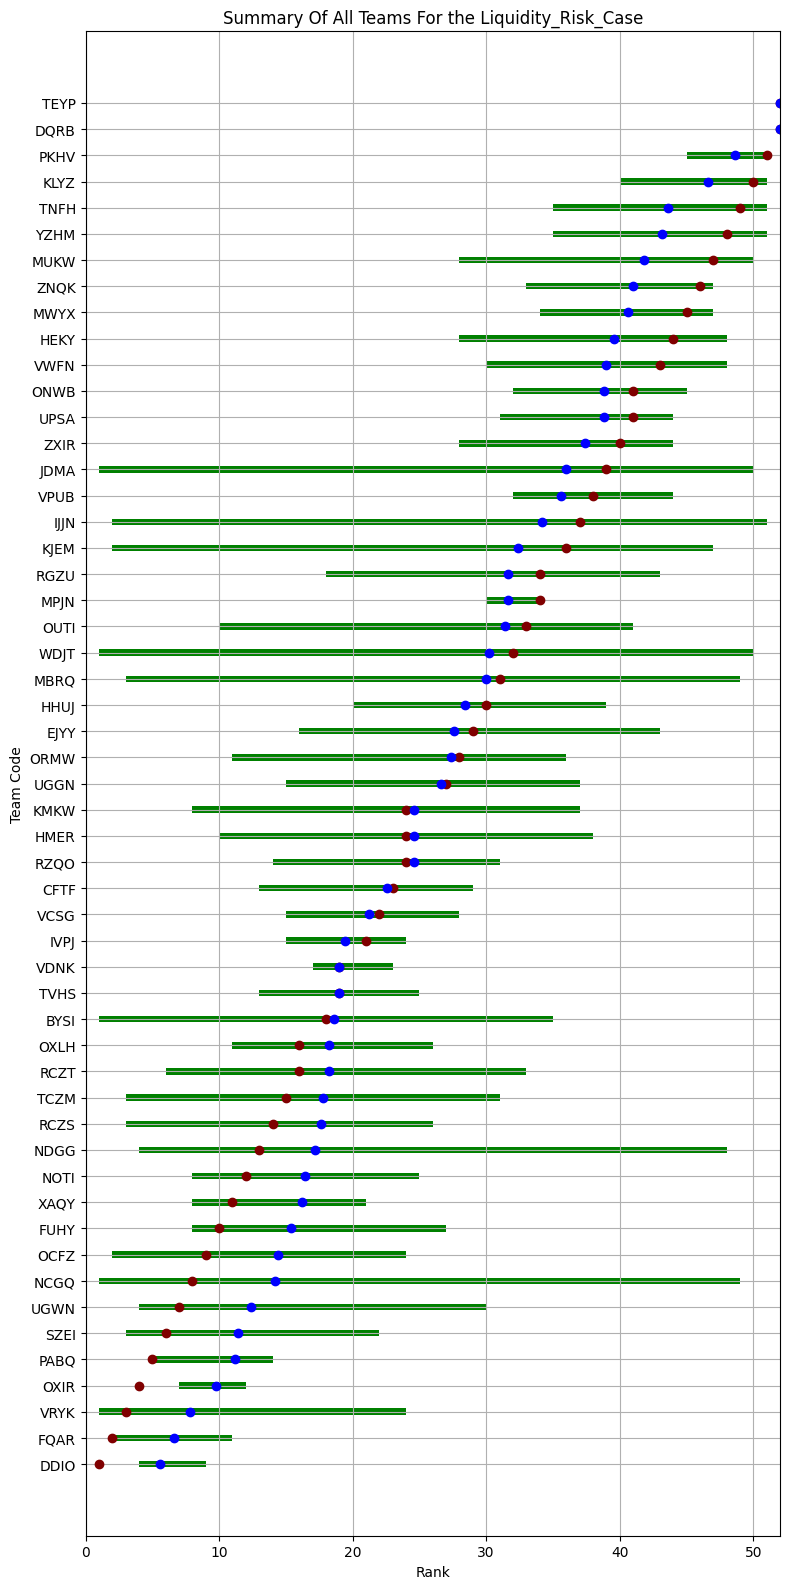

In [14]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111)

ax.plot(
    DF_ALL.loc[:,"Rank"],
    DF_ALL.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "maroon")

ax.plot(
    DF_ALL.loc[:,"Mean"],
    DF_ALL.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "blue")

ax.barh(
    DF_ALL.loc[:,"Team2"],
    DF_ALL.loc[:,"Min"],
    align='center',
    height=.25,
    color='white',
    label='min')

ax.barh(DF_ALL.loc[:,"Team2"],
        DF_ALL.loc[:,"Max"]-DF_ALL.loc[:,"Min"],
        align='center', 
        height=.25,
        left=DF_ALL.loc[:,"Min"],
        color='green',
        label='max')

ax.set_yticks(DF_ALL.loc[:,"Team2"])

ax.grid(True)
plt.title(f"Summary Of All Teams For the {case_name}")

plt.xlabel('Rank')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

### Import Each Heat 

In [15]:
md(f"<font size = 4> Now we are going to import the data for each Subheat of the <b>{case_name}</b>. That data presents the Net Liquidation Value (NLV) for each time. For reference, we know that we have <b>{len(cols)}</b> heats in this case.</font>")  

<font size = 4> Now we are going to import the data for each Subheat of the <b>Liquidity_Risk_Case</b>. That data presents the Net Liquidation Value (NLV) for each time. For reference, we know that we have <b>5</b> heats in this case.</font>

In [16]:
md(f"<font size = 3> <b> Net Liquidation Value (NLV) </b> - Indicated the value of the security if the current position is closed immediately at the best bid (for Long Positions) or best ask (for Short Positions).</font>")  

<font size = 3> <b> Net Liquidation Value (NLV) </b> - Indicated the value of the security if the current position is closed immediately at the best bid (for Long Positions) or best ask (for Short Positions).</font>

In [17]:
# import each heat to get NLV for each team and concatenate each DataFrame
for i in subheats_list:
    if i == subheats_list[0]:
        DF_SUBHEATS = pd.read_excel(f"{file_name}.xlsx", sheet_name=i)
        DF_SUBHEATS.columns = DF_SUBHEATS.loc[0,:]
        DF_SUBHEATS = DF_SUBHEATS.loc[1:,:]
        DF_SUBHEATS.loc[:,"Heat"] = i
    else:
        DF_SUBHEATS_W = pd.read_excel(f"{file_name}.xlsx", sheet_name=i)
        
        DF_SUBHEATS_W.columns = DF_SUBHEATS_W.loc[0,:]
        DF_SUBHEATS_W = DF_SUBHEATS_W.loc[1:,:]
        
        DF_SUBHEATS_W.loc[:,"Heat"] = i
        DF_SUBHEATS = pd.concat([DF_SUBHEATS,DF_SUBHEATS_W])

# DF_SUBHEATS.columns = DF_SUBHEATS.columns.fillna('to_drop')
# DF_SUBHEATS = DF_SUBHEATS.drop(['Comment', 'Adjustment', 'to_drop'], axis=1)

DF_SUBHEATS.loc[:,'NLV'] = DF_SUBHEATS.loc[:,'NLV'].astype('float')
DF_SUBHEATS.loc[:,"Team2"] = DF_SUBHEATS.loc[:,"Team"].str[0:4]

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

md(f"<font size = 4> In order to check if the data has been imported correctly we can do this in the folowing way: We know that we have {DF_SUBHEATS.loc[DF_SUBHEATS['Heat']==subheats_list[0], ['Team']].value_counts()[1]} Users and {len(np.unique(DF_SUBHEATS['Heat']))} Heats and we have {len(np.unique(DF_SUBHEATS['Team']))} teams so multiplying them gives us {DF_SUBHEATS.loc[DF_SUBHEATS['Heat']==subheats_list[0], ['Team']].value_counts()[1]*len(np.unique(DF_SUBHEATS['Heat']))*len(np.unique(DF_SUBHEATS['Team']))} which is the same as the number of rows in our dataframe = {len(DF_SUBHEATS)}. </font>")  

<font size = 4> In order to check if the data has been imported correctly we can do this in the folowing way: We know that we have 4 Users and 5 Heats and we have 53 teams so multiplying them gives us 1060 which is the same as the number of rows in our dataframe = 1060. </font>

In [19]:
md(f"<font size = 4> For reference, check out the first 10 rows:</font>")  

<font size = 4> For reference, check out the first 10 rows:</font>

In [20]:
DF_SUBHEATS.head(10)

,Team,User,NLV,Adjustment,Comment,Heat,Team2
1,BYSI - University College Dublin - Team B,4,156751.984375,0,NaN,LR-1,BYSI
2,BYSI - University College Dublin - Team B,2,39152.0,0,NaN,LR-1,BYSI
3,BYSI - University College Dublin - Team B,3,-40912.0,0,NaN,LR-1,BYSI
4,BYSI - University College Dublin - Team B,1,-130385.992188,0,NaN,LR-1,BYSI
5,CFTF - University of Sydney,3,31165.0,0,NaN,LR-1,CFTF
6,CFTF - University of Sydney,1,6652.0,0,NaN,LR-1,CFTF
7,CFTF - University of Sydney,2,855.0,0,NaN,LR-1,CFTF
8,CFTF - University of Sydney,4,-4690.0,0,NaN,LR-1,CFTF
9,DDIO - Baruch College - Team C,3,72726.0,0,NaN,LR-1,DDIO
10,DDIO - Baruch College - Team C,1,55089.0,0,NaN,LR-1,DDIO


In [21]:
DF_ALL_CASES = pd.read_excel(f'{file_name}.xlsx', sheet_name="finalrank")
best_teams = DF_ALL_CASES.loc[0:5,"Team"]

In [22]:
md(f"<font size = 4> Based on the data from all cases, the six top rank teams are:</font>")  

<font size = 4> Based on the data from all cases, the six top rank teams are:</font>

In [23]:
DF_BEST_TEAMS = pd.DataFrame(data={
    'Team Names': best_teams,
    'Team Codes': best_teams.str[0:4]
})

DF_BEST_TEAMS

,Team Names,Team Codes
0,SZEI - Baruch College - Team B,SZEI
1,DDIO - Baruch College - Team C,DDIO
2,FQAR - University of Ottawa,FQAR
3,VRYK - Baruch College - Team A,VRYK
4,NCGQ - University of Calgary - Team B,NCGQ
5,"RZQO - University of Warsaw, Faculty of Econom...",RZQO


In [24]:
md(f"<font size = 4> The plot below shows the average NLV based on each heat for each user for the best 6 teams. We have the folowing users:</font><br>"
    f"<font size = 3> <b>User 1</b> </font><br>"
    f"<font size = 3> <b>User 2</b></font><br>"
    f"<font size = 3> <b>User 3</b></font><br>"
    f"<font size = 3> <b>User 4</b></font><br>"
  )  

<font size = 4> The plot below shows the average NLV based on each heat for each user for the best 6 teams. We have the folowing users:</font><br><font size = 3> <b>User 1</b> </font><br><font size = 3> <b>User 2</b></font><br><font size = 3> <b>User 3</b></font><br><font size = 3> <b>User 4</b></font><br>

In [25]:
md(f"<font size = 4>However, in each team {DF_SUBHEATS.loc[DF_SUBHEATS['Heat']==subheats_list[0], ['Team']].value_counts()[1]} members participate.</font>")  

<font size = 4>However, in each team 4 members participate.</font>

<Figure size 500x1000 with 0 Axes>

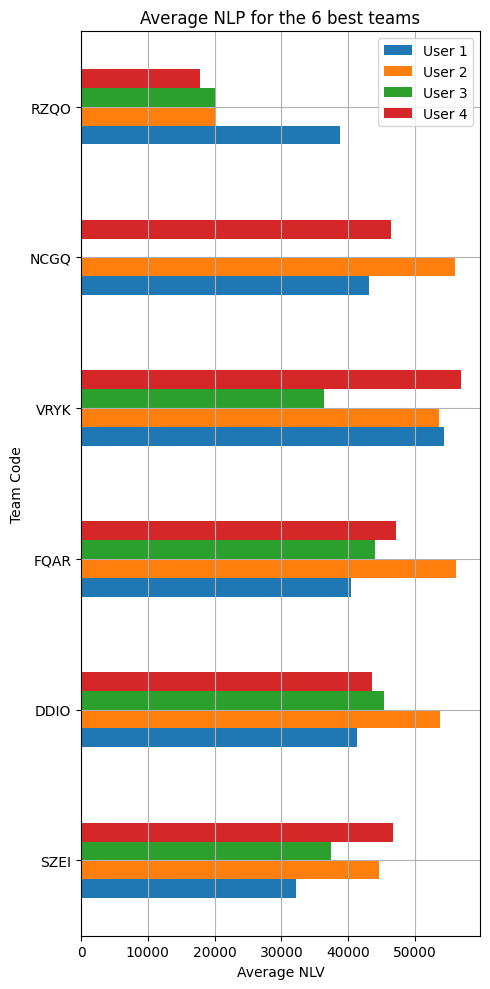

In [26]:
DF_SUBHEATS = DF_SUBHEATS.reset_index(drop=True) # can change that

DF_SUBHEATS['User'] = np.where(DF_SUBHEATS['User']==4, 'User 4', DF_SUBHEATS['User'])
DF_SUBHEATS['User'] = np.where(DF_SUBHEATS['User']==3, 'User 3', DF_SUBHEATS['User'])
DF_SUBHEATS['User'] = np.where(DF_SUBHEATS['User']==2, 'User 2', DF_SUBHEATS['User'])
DF_SUBHEATS['User'] = np.where(DF_SUBHEATS['User']==1, 'User 1', DF_SUBHEATS['User'])

plt.figure(figsize=(5, 10))

x1, x1.columns = df_User(DF_SUBHEATS,'User 1')
x2, x2.columns = df_User(DF_SUBHEATS,'User 2')
x3, x3.columns = df_User(DF_SUBHEATS,'User 3')
x4, x4.columns = df_User(DF_SUBHEATS,'User 4')

data = pd.concat([x1, x2, x3, x4])
data = data.T
data.columns = ['User 1', 'User 2', 'User 3', 'User 4',]

data.loc[best_teams.str[0:4],:].plot.barh(figsize=(5,10))

plt.grid(True)
plt.title("Average NLP for the 6 best teams")

plt.xlabel('Average NLV')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

In [30]:
md(f"<font size = 4> For reference, WNE team (RZQO) performance can be visualized as: </font><br>")  

<font size = 4> For reference, WNE team (RZQO) performance can be visualized as: </font><br>

In [31]:
DF_WNE_OUR = DF_SUBHEATS.loc[DF_SUBHEATS['Team2'] == 'RZQO'][['Team2', 'Heat', 'NLV', 'User']].reset_index(drop=True)
DF_WNE_OUR = DF_WNE_OUR.groupby(['Heat', 'User'])['NLV'].sum().unstack()

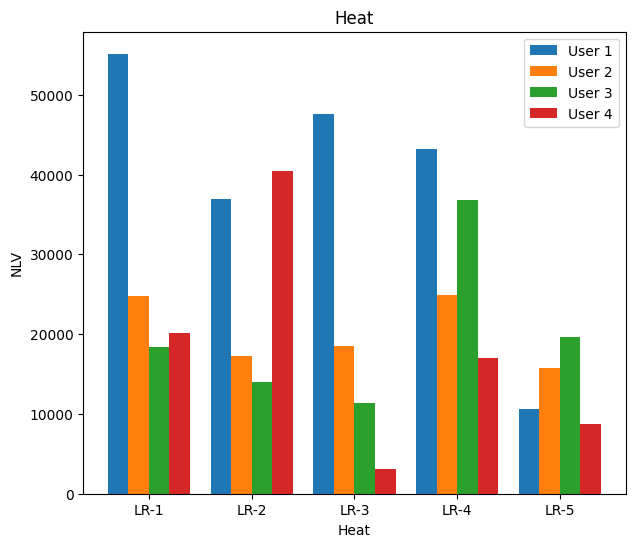

In [32]:
fig, ax = plt.subplots(figsize=(7, 6))
bar_width = 0.20
index = np.arange(len(DF_WNE_OUR.index))

bar1 = ax.bar(index - 1.5 * bar_width, DF_WNE_OUR['User 1'], bar_width, label='User 1')
bar2 = ax.bar(index - 0.5 * bar_width, DF_WNE_OUR['User 2'], bar_width, label='User 2')
bar3 = ax.bar(index + 0.5 * bar_width, DF_WNE_OUR['User 3'], bar_width, label='User 3')
bar4 = ax.bar(index + 1.5 * bar_width, DF_WNE_OUR['User 4'], bar_width, label='User 4')

ax.set_xlabel('Heat')
ax.set_ylabel('NLV')

ax.set_title('Heat')

ax.set_xticks(index)
ax.set_xticklabels(DF_WNE_OUR.index)

ax.legend()

In [33]:
md(f"<font size = 4> This section will present the teams that were on the top 5 Rank of this case - <b>{case_name}</b></font><br>")  

<font size = 4> This section will present the teams that were on the top 5 Rank of this case - <b>Liquidity_Risk_Case</b></font><br>

In [34]:
md(f"<font size = 4> The teams that are on the top 6 in this case are: </b></font><br>")  

<font size = 4> The teams that are on the top 6 in this case are: </b></font><br>

In [35]:
top5_case = DF_ALL.loc[DF_ALL.Rank<=5, "Team2"]
DF_SUBHEATS_top5 = DF_SUBHEATS.loc[DF_SUBHEATS["Team2"].isin(top5_case),:]
top5_case

0    DDIO
1    FQAR
2    VRYK
3    OXIR
4    PABQ
Name: Team2, dtype: object

In [36]:
md(f"<font size = 4> The dataframe after grouping looks like this:</b></font><br>")  

<font size = 4> The dataframe after grouping looks like this:</b></font><br>

In [39]:
%%capture 

DF_SUBHEATS_top5['Team2'] = pd.Categorical(DF_SUBHEATS_top5['Team2'], categories=top5_case, ordered=True)
DF_SUBHEATS_top5 = DF_SUBHEATS_top5.sort_values(by='Team2')

In [40]:
DF_SUBHEATS_top5_pivot = DF_SUBHEATS_top5.pivot_table(index=['Team2', 'Heat'], columns='User', values='NLV', aggfunc='sum')
DF_SUBHEATS_top5_pivot.fillna(0).astype(int)

User        User 1  User 2  User 3  User 4
Team2 Heat                                
DDIO  LR-1   55089   49674   72726   48211
      LR-2   50817   46926   61464   36789
      LR-3   58797   48457   25492   45264
      LR-4    7436   92957   39382   29548
      LR-5   34374   30607   27979   58280
FQAR  LR-1   35823   74633   49572   53295
      LR-2   61875   49197   55210   73797
      LR-3   23720   35398   44116   35285
      LR-4   53980   31547   27586   20076
      LR-5   26943   90069   43709   53117
VRYK  LR-1  114676   66686   21110   94821
      LR-2   45809   39011   46191   76780
      LR-3   33992   34295   12101    9360
      LR-4   40072   77183   43583   62696
      LR-5   37449   50891   59257   40776
OXIR  LR-1   32389   33237   66478   40061
      LR-2   61490   31597   56106   43461
      LR-3   10022   16982   47589   52453
      LR-4   43345   35395   42032   36237
      LR-5   42804    7374   55058   35477
PABQ  LR-1   80537   45399   81657   17348
      LR-2   37542   32380   66157   34869
      LR-3   27385   28636   54942   11606
      LR-4   35887   36920   42786   30722
      LR-5   37872   29192   52170   10772

In [41]:
md(f"<font size = 4> It can be visuaized in the following way: </b></font><br>")  

<font size = 4> It can be visuaized in the following way: </b></font><br>

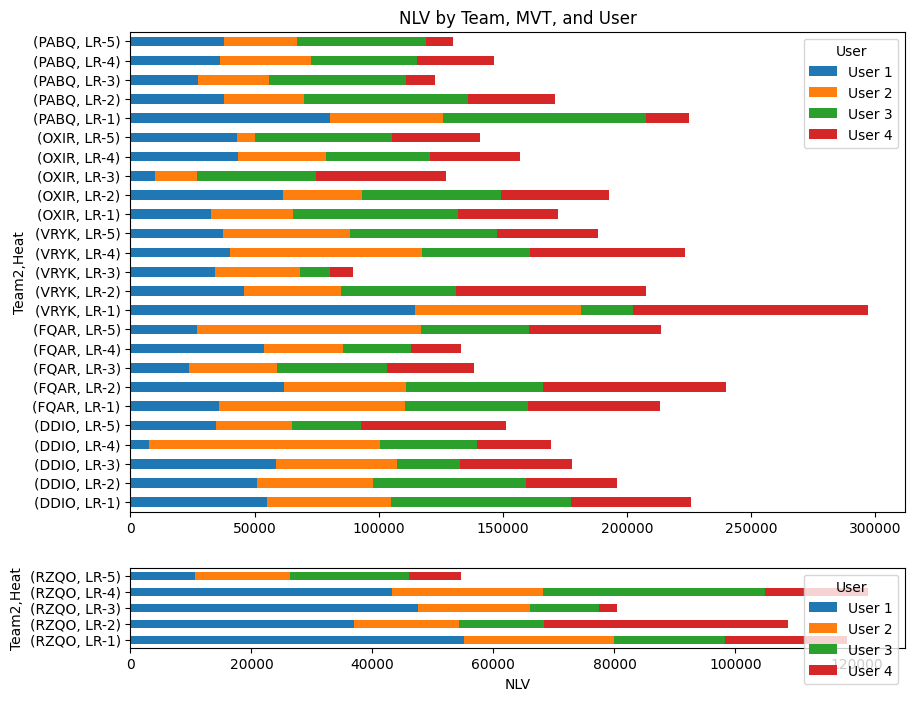

In [43]:
DF_SUBHEATS_RZQO = DF_SUBHEATS.loc[DF_SUBHEATS['Team2']=='RZQO'].pivot_table(index=['Team2', 'Heat'], columns='User', values='NLV', aggfunc='sum')

# Plot a horizontal bar chart
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={'height_ratios': [6, 1]})

DF_SUBHEATS_top5_pivot.plot(kind='barh', stacked=True, ax=axes[0])
DF_SUBHEATS_RZQO.plot(kind='barh', stacked=True, ax=axes[1])

axes[0].set_title('NLV by Team, MVT, and User')
axes[1].set_xlabel('NLV')

axes[0].legend(title='User')

plt.show()

In [44]:
md(f"<font size = 4> Average of Users per Heat for top rank teams: </b></font><br>")  

<font size = 4> Average of Users per Heat for top rank teams: </b></font><br>

In [57]:
DF_SUBHEATS_top5_mean = pd.DataFrame(DF_SUBHEATS_top5.groupby(['Team2','Heat'])['NLV'].mean())

DF_SUBHEATS_top5_mean["Team2"] = [ind[0] for ind in DF_SUBHEATS_top5_mean.index]
DF_SUBHEATS_top5_mean["Heat"] = [ind[1] for ind in DF_SUBHEATS_top5_mean.index]

DF_SUBHEATS_top5_mean_pivot = DF_SUBHEATS_top5_mean.pivot(index='Team2', columns='Heat', values='NLV').astype(int)
DF_SUBHEATS_top5_mean_pivot

Heat,LR-1,LR-2,LR-3,LR-4,LR-5
Team2,,,,,
DDIO,56425,48999,44502,42330,37810
FQAR,53330,60019,34630,33297,53459
OXIR,43041,48163,31761,39252,35178
PABQ,56235,42737,30642,36579,32501
VRYK,74323,51947,22437,55883,47093


In [58]:
DF_SUBHEATS_RZQO_mean = pd.DataFrame(DF_SUBHEATS.loc[DF_SUBHEATS['Team2']=='RZQO'].groupby(['Team2', 'Heat'])['NLV'].mean())

DF_SUBHEATS_RZQO_mean["Team2"] = [ind[0] for ind in DF_SUBHEATS_RZQO_mean.index]
DF_SUBHEATS_RZQO_mean["Heat"] = [ind[1] for ind in DF_SUBHEATS_RZQO_mean.index]

DF_SUBHEATS_RZQO_mean_pivot = DF_SUBHEATS_RZQO_mean.pivot(index='Team2', columns='Heat', values='NLV').astype(int)
DF_SUBHEATS_RZQO_mean_pivot

Heat,LR-1,LR-2,LR-3,LR-4,LR-5
Team2,,,,,
RZQO,29601,27174,20118,30497,13666


In [59]:
md(f"<font size = 4> We can also visualize it based on the average values of users for each Heat:</b></font><br>")  

<font size = 4> We can also visualize it based on the average values of users for each Heat:</b></font><br>

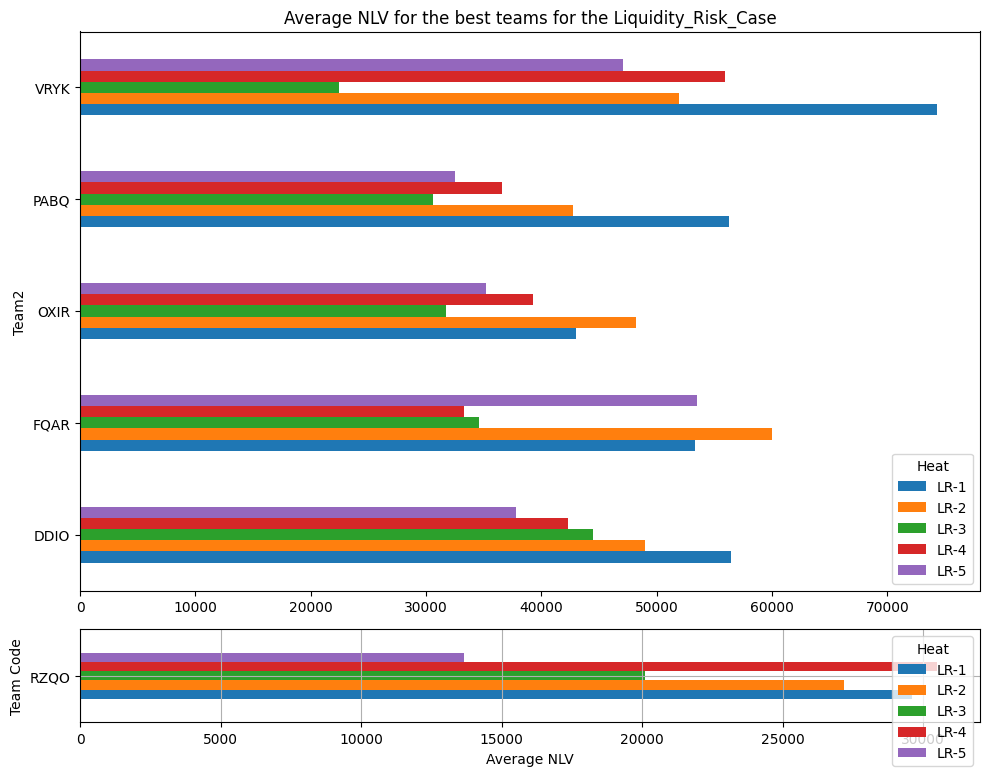

In [63]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={'height_ratios': [6, 1]})

DF_SUBHEATS_top5_mean_pivot.plot.barh(figsize=(10,8), ax=ax1)
DF_SUBHEATS_RZQO_mean_pivot.plot.barh(figsize=(10,8), ax=ax2)

plt.grid(True)
ax1.set_title(f"Average NLV for the best teams for the {case_name}")

plt.xlabel('Average NLV')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

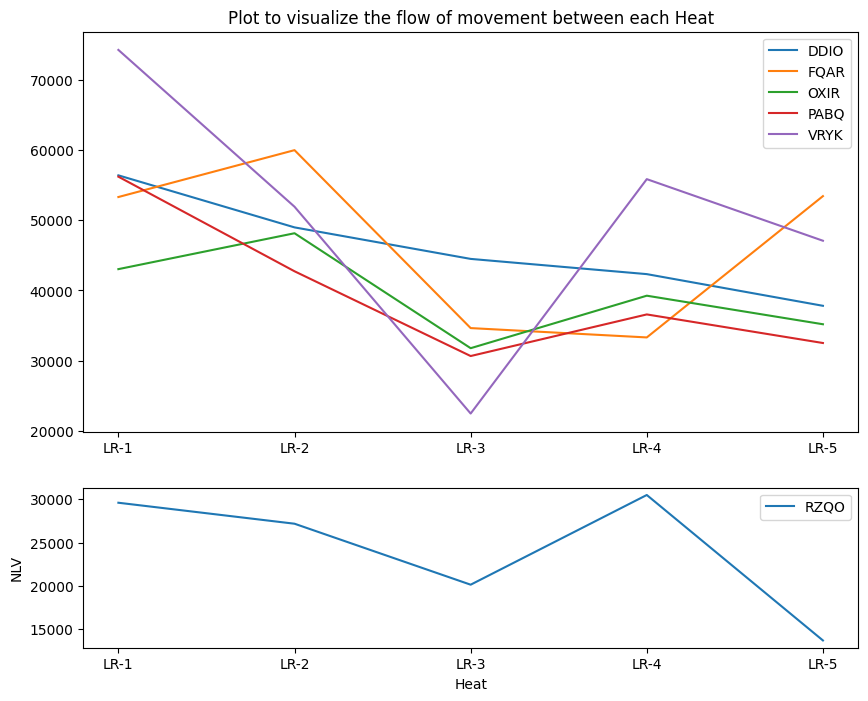

In [67]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={'height_ratios': [5, 2]})

for team in DF_SUBHEATS_top5_mean_pivot.index:
    ax1.plot(DF_SUBHEATS_top5_mean_pivot.columns, DF_SUBHEATS_top5_mean_pivot.loc[team].values, label=team)

ax2.plot(DF_SUBHEATS_RZQO_mean_pivot.columns, DF_SUBHEATS_RZQO_mean_pivot.loc['RZQO'].values, label='RZQO')


plt.xlabel('Heat')
plt.ylabel('NLV')

ax1.set_title('Plot to visualize the flow of movement between each Heat')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

### Simulation with DF_ALL

In [ ]:
# UNDERSTAND THIS

In [ ]:
for place in range(1, 20):
    DF_ALL_NEW = DF_ALL.copy()
    DF_ALL_NEW = DF_ALL_NEW.loc[~DF_ALL_NEW["Team"].str.contains("RZQO"),:] # Removing WNE
    
    subheats = DF_ALL_NEW.columns[DF_ALL_NEW.columns.str.contains("Details")] # Getting the Subheats
    # zeby zalatac dziurę po usunieciu WWA
    DF_ALL_NEW[subheats] = DF_ALL_NEW[subheats].rank()
    
    for subheat in subheats:
        DF_ALL_NEW.loc[DF_ALL_NEW[subheat]>=place, subheat] +=1
    
    DF_ALL_NEW["Mean"] = DF_ALL_NEW[subheats].mean(axis = 1)
    
    print(place, DF_ALL_NEW.loc[1,"Mean"]>=place)
    
    if ~(DF_ALL_NEW.loc[1,"Mean"]>=place):
        break

##

##